In [1215]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True):
    columns = [c for c in df.columns if c_filter in c]
    if mean:
        gd = df.groupby('epoch').mean()
    else:
        gd = df

    gd.dropna(inplace=True)

    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd[columns].plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [1348]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/2024-10-22\ 2014 ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=239-step=1679.ckpt                      100%  178KB   1.4MB/s   00:00    
hparams.yaml                                  100%  210     5.5KB/s   00:00    
metrics.csv                                   100%   17KB 525.7KB/s   00:00    
params.pt                                     100%  495    16.1KB/s   00:00    


In [1349]:
metrics_path = './experiments/2024-10-22 2014/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [1350]:
# display(metrics, 'mvc', 'MVC Score')

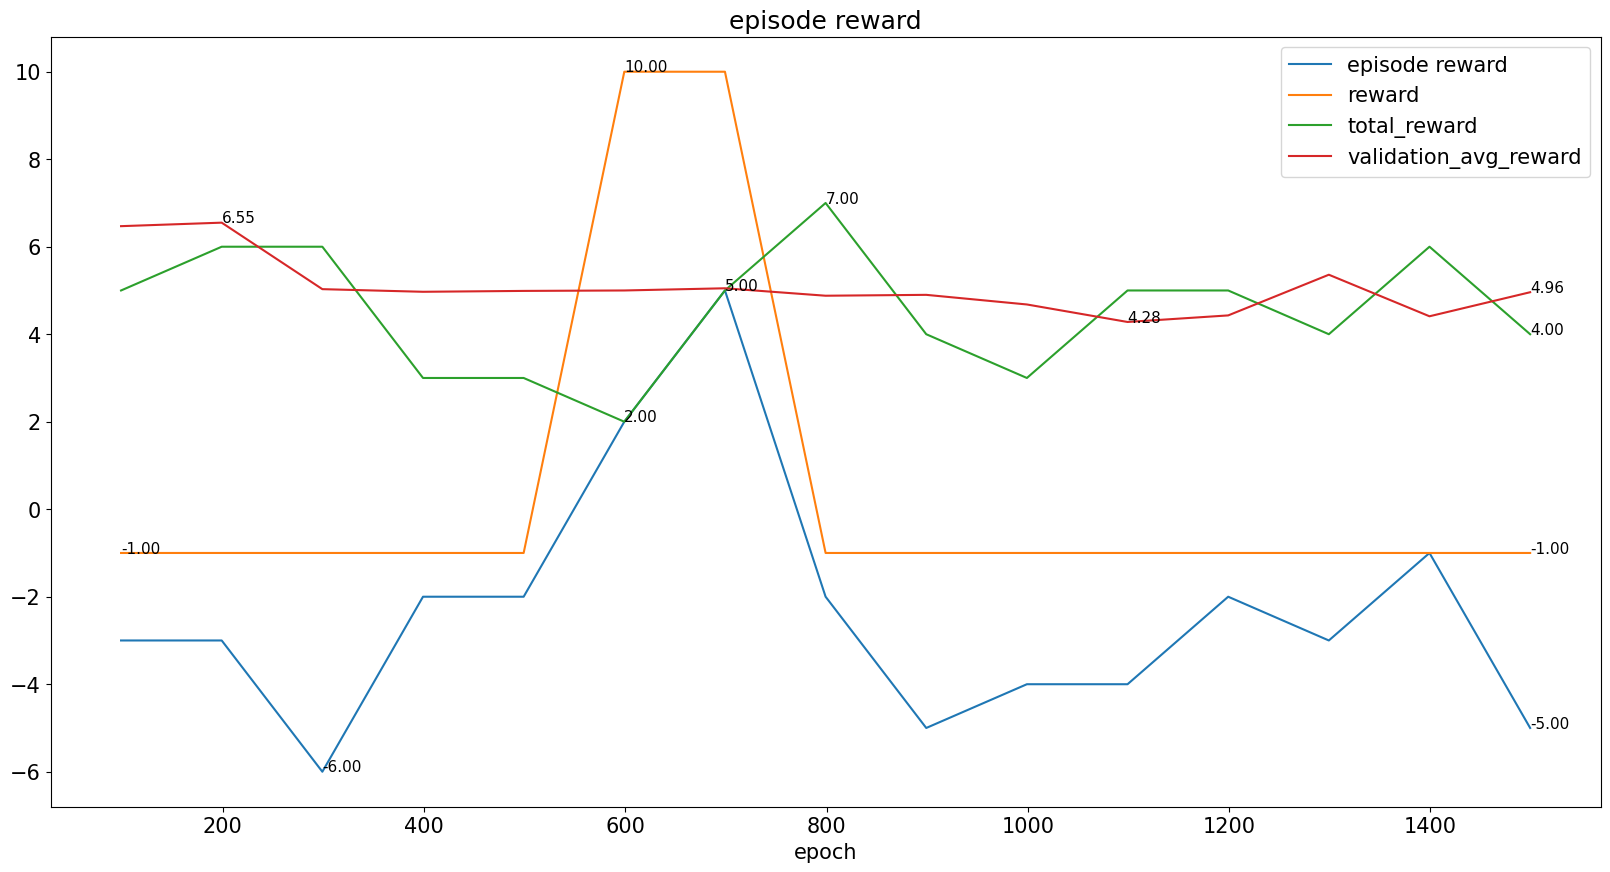

In [1351]:
display(metrics, 'reward', 'episode reward')

In [1352]:
# display(metrics, 'aon', 'All or Nothing')

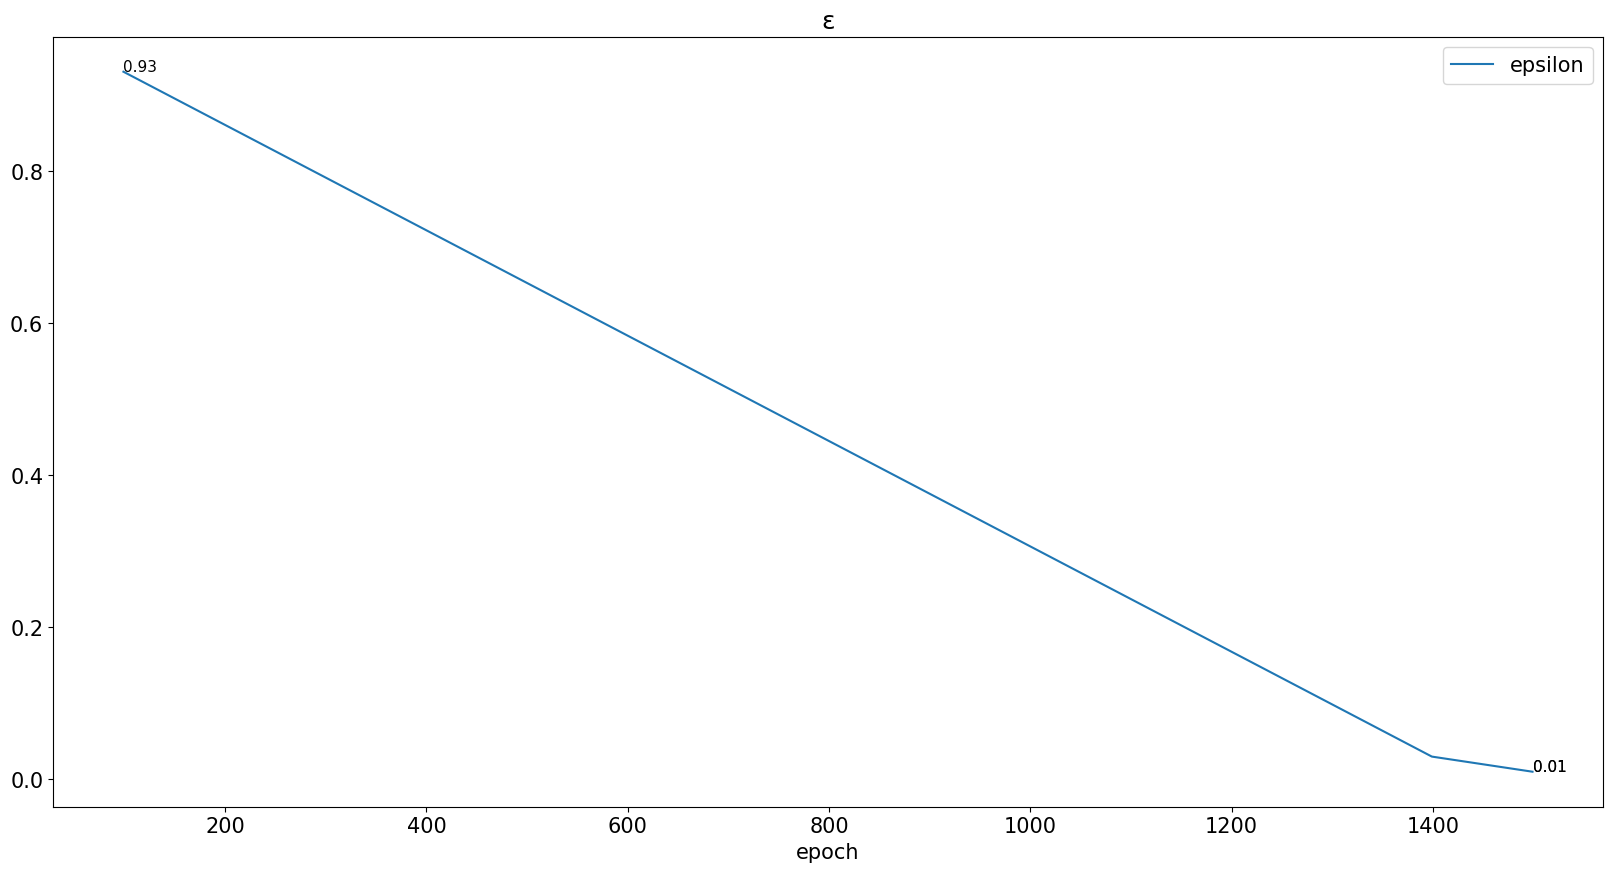

In [1370]:
display(metrics, 'epsilon', 'ε')

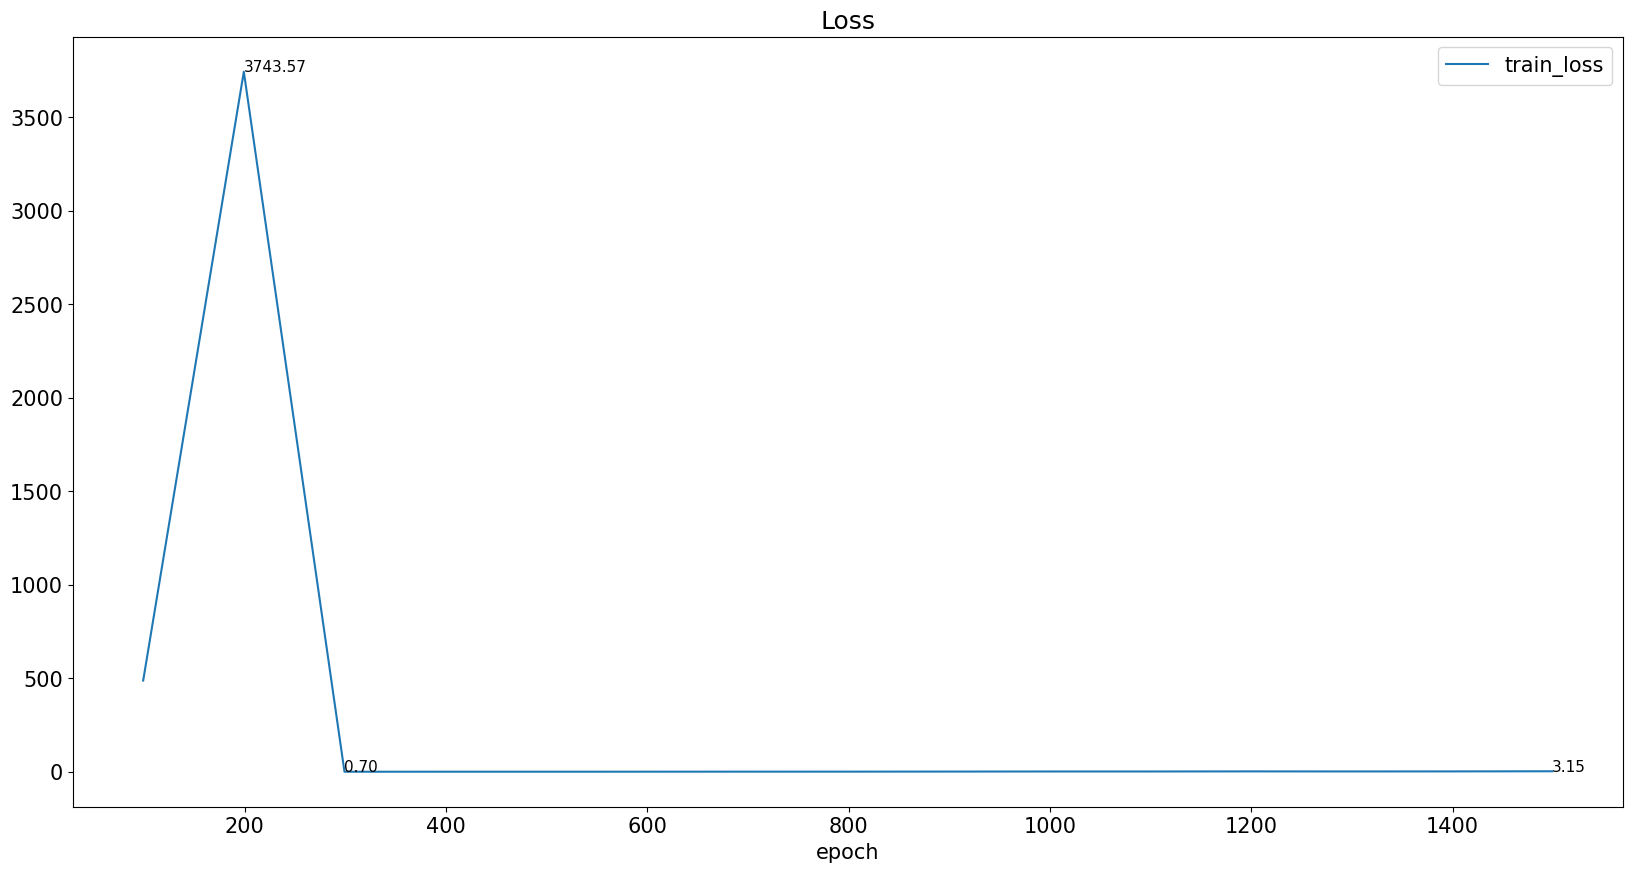

In [1354]:
display(metrics, 'loss', 'Loss')

In [1355]:
metrics

,epsilon,episode reward,reward,train_loss,total_reward,epoch,step,validation_avg_reward,apx_ratio_avg
0,0.995149,-1.0,-1.0,5.477821,7.0,7,49,NaN,NaN
1,0.990199,-7.0,-1.0,3.023861,8.0,14,99,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,19,139,6.34,1.213500
3,0.985249,-1.0,-1.0,1.790650,3.0,21,149,NaN,NaN
4,0.980299,-8.0,-1.0,10.945183,6.0,28,199,NaN,NaN
...,...,...,...,...,...,...,...,...,...
280,NaN,NaN,NaN,NaN,NaN,1479,10359,4.39,1.749500
281,0.010000,-3.0,-1.0,2.382171,4.0,1485,10399,NaN,NaN
282,0.010000,3.0,10.0,2.705645,3.0,1492,10449,NaN,NaN
283,0.010000,-5.0,-1.0,3.151205,4.0,1499,10499,NaN,NaN


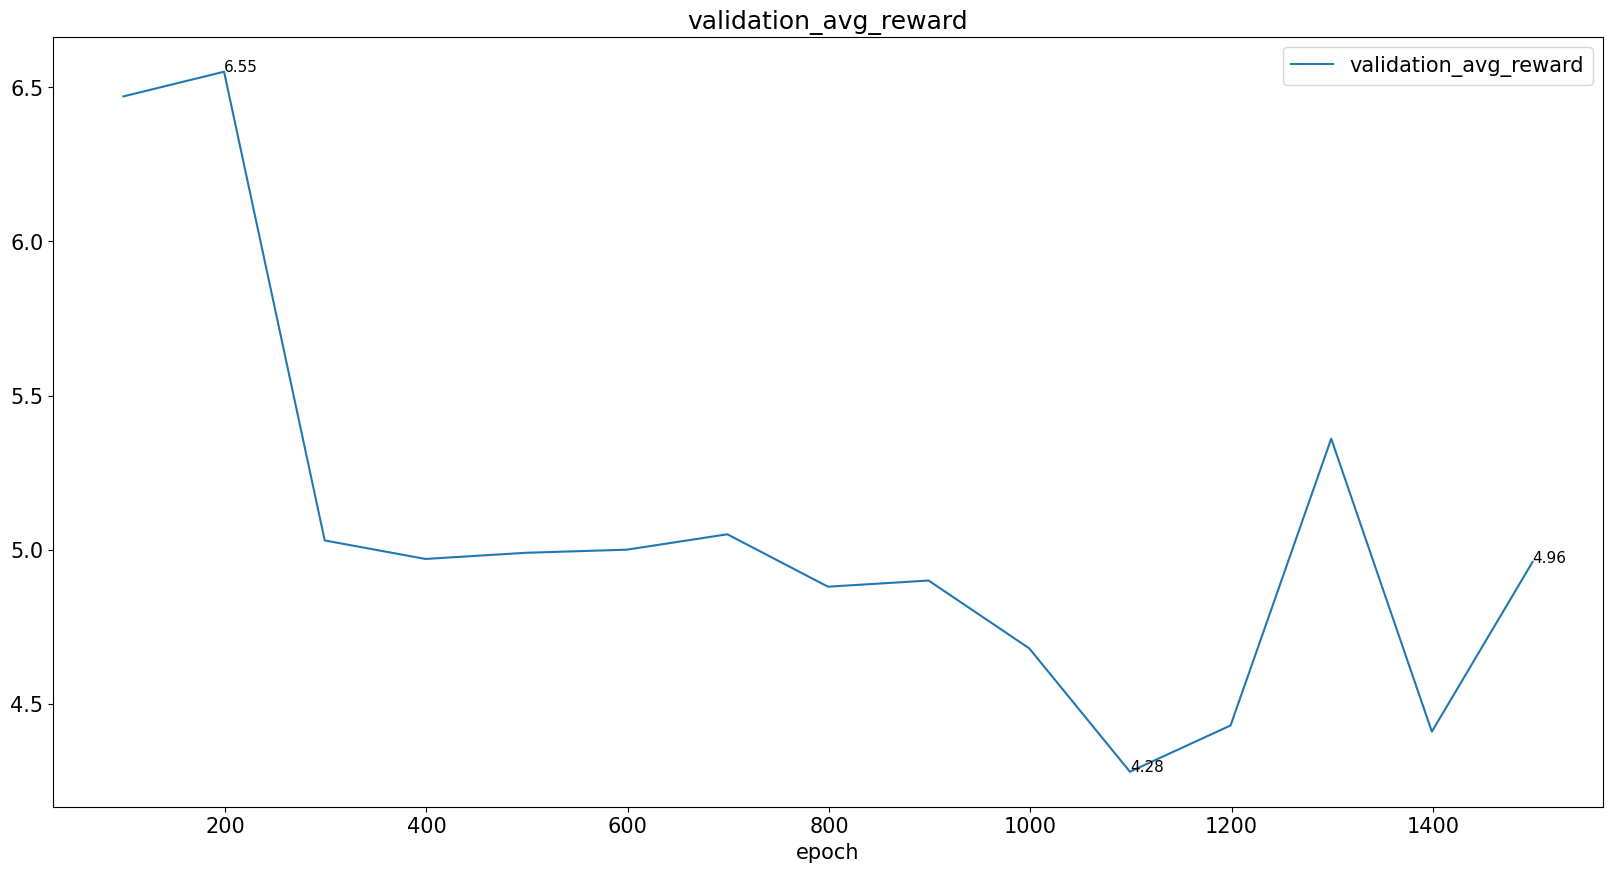

In [1356]:
display(metrics, 'validation_avg_reward', 'validation_avg_reward')

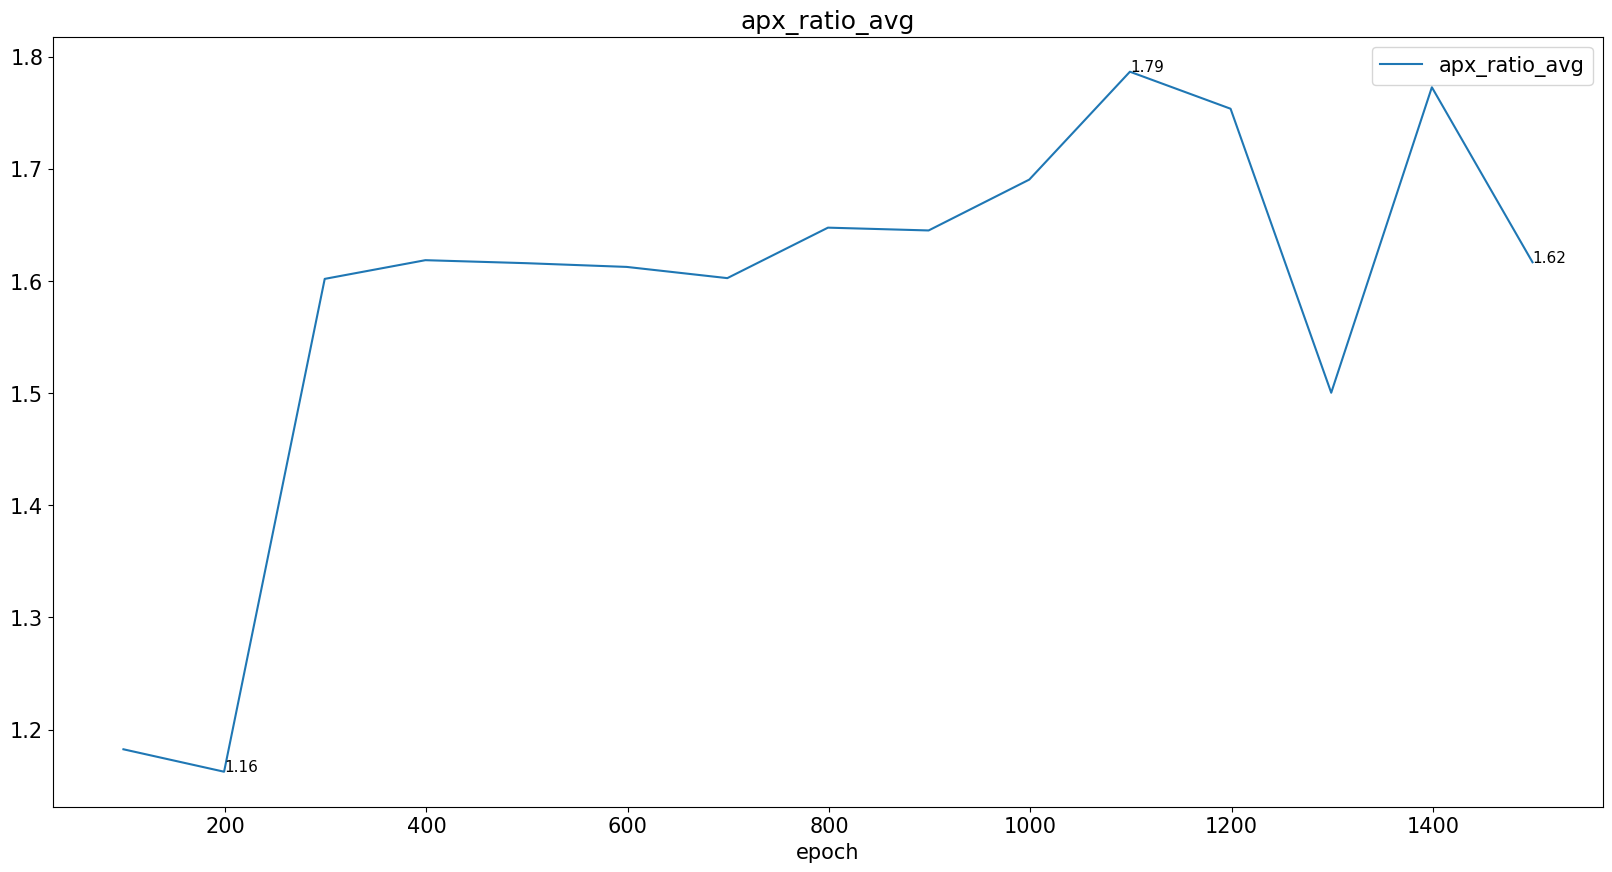

In [1357]:
display(metrics, 'apx_ratio_avg', 'apx_ratio_avg')

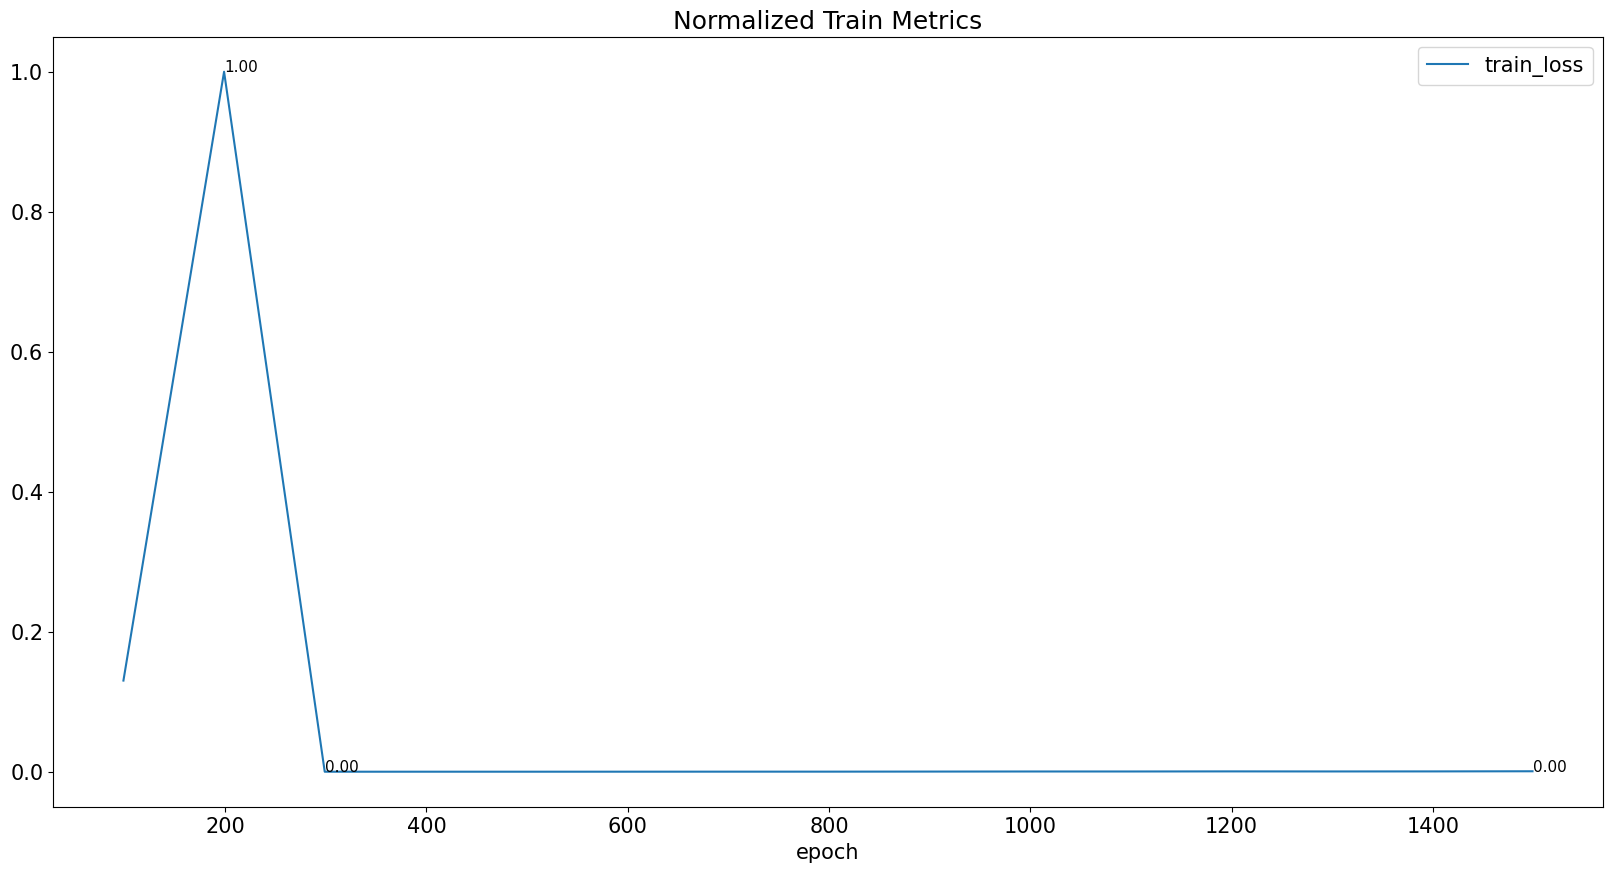

In [1358]:
display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [1359]:
for ax in axes:
    plt.close(ax.get_figure())